# Recommendation Engine / System
## Proyecto: Recomendador de Tienda Pippo
Usaremos Collaborative Filtering
Artículo completo en www.aprendemachinelearning.com

Adaptamos la base bajando cantidades de registros de manera de poder ser manejado por el notebook a 3 meses y ordenando por los typos de productos para hacer manejables las matrices

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

In [2]:
df_users = pd.read_csv("Data_usuarios.csv")
# Ya eliminamos la columna Unnamed: 0, desde la creacion de la base
df_users.shape

(14966, 1)

In [3]:
df_repos = pd.read_csv("Data_product.csv")
# Ya eliminamos la columna Unnamed: 0, desde la creacion de la base, en este caso por ser salida del groupby directamente
df_repos.shape

(1255, 3)

In [4]:
df_ratings = pd.read_csv("Datarecoreducida.csv")
# Ya eliminamos la columna Unnamed: 0, desde la creacion de la base
df_ratings.shape

(58464, 3)

In [5]:
df_users.head()

,userId
0,0
1,5
2,13
3,20
4,25


In [6]:
df_repos.head()

,title,categories,stars
0,Accesorios,612,40
1,Accesorios,625,3
2,Accesorios,655,27
3,Accesorios,999,20
4,Accesorios,1002,15


In [7]:
df_ratings.head()

,rating,title,userId
0,1,Toallas y Toallones,0
1,1,Toallas y Toallones,0
2,1,Sábanas,0
3,1,Sábanas,0
4,1,Sábanas,5


In [8]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.title.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

14966 users
27 items


(array([50841.,     0.,  6356.,     0.,     0.,   588.,     0.,   679.]),
 array([1.   , 1.375, 1.75 , 2.125, 2.5  , 2.875, 3.25 , 3.625, 4.   ]),
 <a list of 8 Patch objects>)

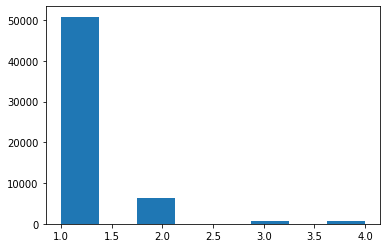

In [9]:
plt.hist(df_ratings.rating,bins=8)

In [10]:
df_ratings.groupby(["rating"])["userId"].count()

rating
1    50841
2     6356
3      588
4      679
Name: userId, dtype: int64

(array([22.,  1.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([5.0000000e+00, 2.5921250e+03, 5.1792500e+03, 7.7663750e+03,
        1.0353500e+04, 1.2940625e+04, 1.5527750e+04, 1.8114875e+04,
        2.0702000e+04]),
 <a list of 8 Patch objects>)

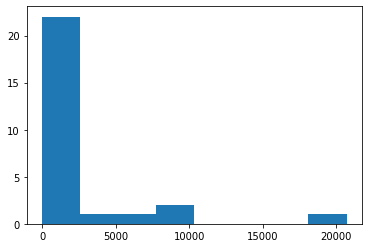

In [11]:
plt.hist(df_ratings.groupby(["title"])["title"].count(),bins=8)

## Método 1: User-Based¶

In [12]:
df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='title').fillna(0)
df_matrix

title,Accesorios,Acolchados y Frazadas,Adornos,Alfombras,Almohadas,Almohadones,Aromatizadores,Bandejas,Bebé,Cajas y Cajones,...,Muebles,Para Dormir,Para Trabajo,Para Uso,Placard,Sillas,Sábanas,Toallas y Toallones,Vajilla,Velas
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
13,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
38,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0


In [13]:
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 7.99%


In [14]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.4, shuffle=False, random_state=42)

In [15]:
ratings_train.shape

(8979, 27)

In [16]:
ratings_test.shape

(5987, 27)

* Matriz de similitud entre los usuarios (distancia del coseno -vectores-).
* Predecir la valoración desconocida de un ítem i para un usuario activo u basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
* Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.

In [17]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)

In [18]:
sim_matrix.shape

(14966, 14966)

In [19]:
# sim_matrix

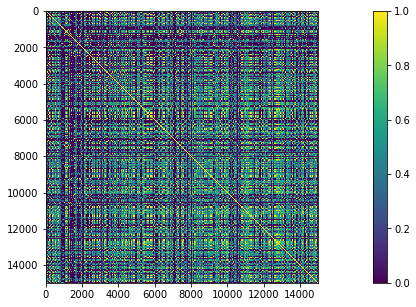

In [20]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

In [21]:
#separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:8979,0:8979]
sim_matrix_test = sim_matrix[8979:14966,8979:14966]
print(sim_matrix_train.shape)
print(sim_matrix_test.shape)

(8979, 8979)
(5987, 5987)


## Predicciones (las recomendaciones!)

In [22]:
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

In [23]:
users_predictions.shape

(8979, 27)

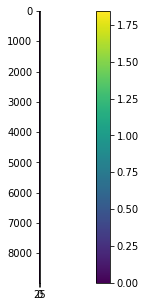

In [24]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

### Veamos un ejemplo

In [25]:
USUARIO_EJEMPLO = 0 # debe existir en nuestro dataset de train!
data = df_users[df_users['userId'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] -1 # resta 1 para obtener el index de pandas
user0=users_predictions.argsort()[usuario_ver]

# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repos[df_repos['title']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

Series([], Name: title, dtype: object) puntaje: 0.21376034965924617
Series([], Name: title, dtype: object) puntaje: 0.28441938941015316
Series([], Name: title, dtype: object) puntaje: 1.0538580497025087


## Medir el Error

In [26]:
def get_mse(preds, actuals):
    if preds.shape[1] != actuals.shape[1]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [27]:
get_mse(users_predictions, ratings_train)

0.5928255610278126

In [28]:
# Realizo las predicciones para el test set
users_predictions_test = sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
users_predictions_test = users_predictions_test[8979:14966,:]

get_mse(users_predictions_test, ratings_test)

0.5755061335984347

# Método 2: Usando Nearest Neighbors

In [29]:
k = 8
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

In [30]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)
top_k_distances.shape

(8979, 8)

In [31]:
top_k_distances[usuario_ver]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
top_k_users.shape

(8979, 8)

In [33]:
res = top_k_users[usuario_ver]
res

array([201, 101,  97,  91, 679,   1,  89,  92], dtype=int64)

In [34]:
for a_index in res:
    print(df_users[df_users['userId'] == (a_index+1)])

Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
Empty DataFrame
Columns: [userId]
Index: []
    userId
16      93


In [35]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / \
    np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

C:\Users\hmarq\Anaconda3\envs\Pippo\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [36]:
users_predicts_k.shape

(8979, 27)

In [37]:
users_predicts_k

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.        , 1.        , 0.42654743, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [38]:
# Hago esto, porque veo que luego da error en el calculo del get_mse (para chequear) 
users_predicts_k[np.isnan(users_predicts_k)] = 0

#users_predicts_k = users_predicts_k[~np.isnan(users_predicts_k)]

In [39]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.42654743, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

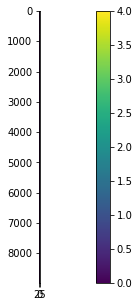

In [40]:
plt.imshow(users_predicts_k);
plt.colorbar()
plt.show()

In [41]:
user0=users_predicts_k.argsort()[usuario_ver][-4:]
# los tres con mayor puntaje en la predic para este usuario
# agrego 4 puesto que uno es mi propio repositorio
for aRepo in user0:
    selRepo = df_repos[df_repos['title'] == (aRepo+1)]
    print(selRepo['title'], 'puntaje:', users_predicts_k[usuario_ver][aRepo])

Series([], Name: title, dtype: object) puntaje: 0.0
Series([], Name: title, dtype: object) puntaje: 0.0
Series([], Name: title, dtype: object) puntaje: 0.0
Series([], Name: title, dtype: object) puntaje: 0.0


In [42]:
get_mse(users_predicts_k, ratings_train)

0.7342963772196088

In [43]:
get_mse(users_predicts_k, ratings_test)

1.4134627018070152

# Método 3: Collaborative Filtering Basado en Items

In [44]:
#basado en items
n_repos = ratings_train.shape[1]
n_repos

27

In [45]:
neighbors = NearestNeighbors(n_repos, 'cosine')
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                 radius='cosine')

In [46]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)
top_k_distances.shape

(27, 27)

In [47]:
top_k_items

array([[ 0, 13, 22, 25, 15, 26, 14,  8, 19,  7,  9, 20, 12,  3,  6, 18,
        21, 10,  2, 17, 11,  4, 16,  1, 24,  5, 23],
       [ 1,  8, 22, 25, 26, 15, 14, 13, 19,  7, 10, 20,  9, 18,  3, 12,
        21,  0,  6,  2, 11, 17,  4, 16, 23, 24,  5],
       [ 2, 22, 15, 26, 25, 14,  8, 13, 19,  7,  9, 20, 12,  3, 18, 21,
        10,  6,  0, 11, 17,  4, 16,  1, 24,  5, 23],
       [ 3, 22, 25, 15, 26, 14,  8, 13, 19,  7,  9, 20, 12, 18, 21, 10,
         6,  0,  2, 17, 11,  4, 16,  1, 24,  5, 23],
       [ 4, 22, 25, 26,  8, 15, 14, 19, 13,  7,  9, 20, 18, 12,  3, 21,
        10,  6,  0,  2, 11, 17, 16,  1, 24,  5, 23],
       [ 5,  7, 15, 19, 26, 14, 22, 25,  8, 10, 13,  3, 12, 20,  9, 18,
        21,  6,  0,  2, 11, 17,  4, 16,  1, 24, 23],
       [ 6, 13, 22, 26, 14, 25, 15,  8, 19,  7,  9, 20, 12,  3, 18, 21,
        10,  0,  2, 17, 11,  4, 16,  1, 24,  5, 23],
       [ 7, 22, 15, 25, 26,  8, 14, 13, 19,  9, 20,  3, 12, 18, 21, 10,
         6,  0,  2, 17, 11,  4, 16,  1, 24,  5, 23],


In [48]:
data = df_repos[df_repos['categories'] == 612]
repo_ver = data.iloc[0]['categories'] -1
#print(repo_ver)

In [49]:
df_repos[df_repos['categories'].isin([repo_ver+1])]

,title,categories,stars
0,Accesorios,612,40


In [50]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

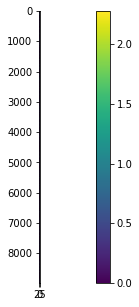

In [51]:
plt.imshow(item_preds);
plt.colorbar()
plt.show()

In [52]:
user0=item_preds.argsort()[usuario_ver]
user0

# los tres con mayor puntaje en la predic para este usuario
for aRepo in user0[-3:]:
    selRepo = df_repos[df_repos['title']==(aRepo+1)]
    print(selRepo['title'], 'puntaje:', item_preds[usuario_ver][aRepo])

Series([], Name: title, dtype: object) puntaje: 0.12188096986017871
Series([], Name: title, dtype: object) puntaje: 0.12641338977156152
Series([], Name: title, dtype: object) puntaje: 0.13374411206496092


In [53]:
get_mse(item_preds, ratings_train)

1.2904720035491684

In [54]:
get_mse(item_preds, ratings_test)

1.3405394429836321

# Método 4: recomendacion por Correlacion

In [55]:
average_rating = pd.DataFrame(df_ratings.groupby('title')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df_ratings.groupby('title')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

mi_repo_ratings = df_matrix['Sábanas']
similar_to_mine = df_matrix.corrwith(mi_repo_ratings)
corr_mine = pd.DataFrame(similar_to_mine, columns=['pearsonR'])
corr_mine.dropna(inplace=True)
corr_summary = corr_mine.join(average_rating['rating'])
corr_summary[corr_summary['rating']>=1].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,rating
title,,
Sábanas,1.000000,1.044923
Cama,0.016021,1.091922
Bebé,0.003909,1.000000
Adornos,0.002471,1.072776
Sillas,-0.004993,1.000000
Acolchados y Frazadas,-0.005673,1.089207
Vajilla,-0.006571,1.047619
Almohadas,-0.010509,1.536030
Velas,-0.013416,1.062500


In [56]:
# Veamos uno de los recomendados
df_repos[df_repos['title'] == 'Sábanas']

,title,categories,stars
918,Sábanas,3,43
919,Sábanas,4,178
920,Sábanas,5,35
921,Sábanas,6,89
922,Sábanas,44,132
923,Sábanas,49,25
924,Sábanas,50,28
925,Sábanas,51,11
926,Sábanas,52,191
927,Sábanas,54,258


# Método 5: Repo mas popular -sin collaborative filtering-

Esta es la manera básica y sin uso de machine learning de ofrecer recomendaciones. 
estas no serán personalizadas, serán iguales para cualquier usuario

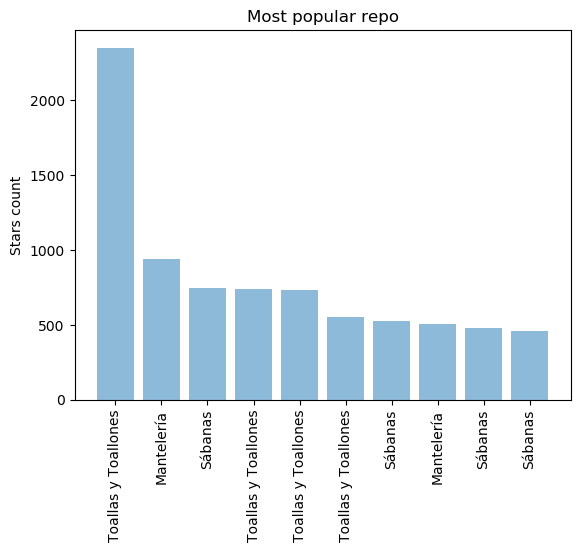

In [57]:
popular_repo = df_repos[['title','stars']].groupby('stars').sum().reset_index()
popular_repo_top_20 = popular_repo.sort_values('stars', ascending=False).head(n=10)

plt.rcdefaults()
 
objects = (list(popular_repo_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_repo_top_20['stars'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Stars count')
plt.title('Most popular repo')
 
plt.show()